# Problem set

## 1. Build a classification model to predict gender of the customer in the BankSim data set.

1. Perform EDA in `notebooks/01_eda` to understand the data and generate [ideas](https://github.com/dvquy13/banksim/issues/3) about how to approach the prediction problem.
2. Preprocess raw data in ML friendly format `notebooks/02_preprocess` by:
   - Remove ambiguous rows
   - Aggregate basic stats features by user
3. Establish benchmark by trying Google Cloud AutoML on those basic features (data `fe1`).
4. Reason a minimum-effort baseline for predicting gender `notebooks/03_model`.
5. Play with LogisticRegression with data `fe1`.
6. Incorporate information about `merchant` and `category` (kind of OneHotEncoding but use aggregated stats instead of flag 1/0).
7. Try Google Cloud AutoML again to see whether poor performance is due to not including `merchant` interactions.
8. [Experiment with different types of learning algorithms](https://github.com/dvquy13/banksim/issues/10)
    - Start with Random Forest `notebooks/04_model_rf`, trying to first overfit the train_data with the least number of trees.
    - Modify hyper-params which controls complexity to reduce variance.
    - Plot feature importance and try to do feature selection to reduce the complexity.
    - Plot learning curve to observe the sensitivity of model wrt. number of observations.
9. Quickly tune the hyper-params with Bayesian Optimization using `hyperopt` `notebooks/04_model_rf_hyper-params-tuning`
10. Trying LightGBM, which is a boosting algorithm and also state-of-the-art `notebooks/05_model_lgb`
11. Not able to beat baseline, so next I focus on feature engineering.
    - Iterate over [featuretools](https://www.featuretools.com/) to generate about 300 features more `notebooks/02_issue8_preprocess_featuretools` (data `fe3`)
    - Manually encode `gender` proportions information into `merchant` to see if any improvements

## 2. Visualize model tuning and results

## Results

Most of my experiments are tracked using [MLflow](https://www.mlflow.org/docs/latest/tracking.html). To access this local web service, please install the environment as suggested in `conda.yaml`. Then run `mlflow ui` from the root directory. Make sure you run it from my folder where there is a `mlruns/` folder.

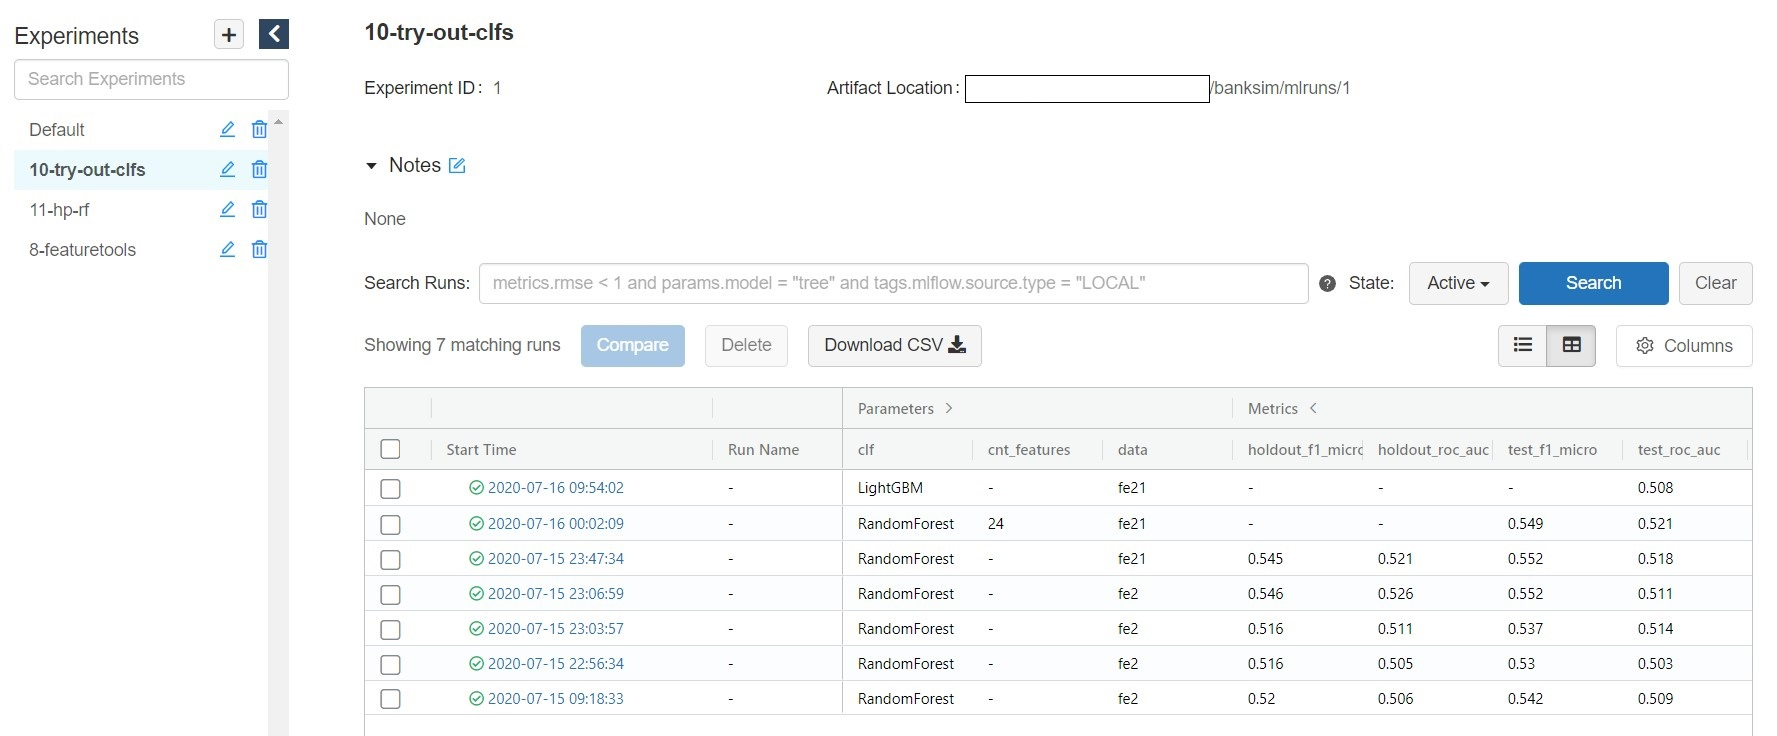

## Tuning

Please refer to `notebooks/04_model_rf_hyper-params-tuning`.

# Next steps

Perform deep analysis into why learning algorithsm can not beat simple baseline for this dataset. My hypothesis is that I might have shuffled the customer ids and features during the preprocessing step. I might want to try [leaking label](https://www.mlflow.org/docs/latest/tracking.html) to test this hypothesis.

Trying the ideas listed [here](https://github.com/dvquy13/banksim/issues/3).

Experiment with Graph analytics. For example: building a network of Customer and Merchant. Use the graph to add new customer features like `connectivity` or decect commnunities of alike shoppers.